<a href="https://colab.research.google.com/github/JaiKumar1717/FMML-Notebook/blob/main/Lab_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and Probability: Fundamentals

In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [85]:
def tc(number_of_tosses=100):
  return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def td(number_of_tosses=100):
  return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [86]:
results = tc()
print(results.value_counts())
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),
                      y=results.value_counts().values)])
fig.show()

Tails    52
Heads    48
Name: count, dtype: int64


##Derived Probability Distributions

In [87]:
results = pd.Series([np.sum(tc(50) == 'Heads') for _ in range(10000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [88]:
results = pd.Series([np.sum(tc(200) == 'Heads') for _ in range(100000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [89]:
results = pd.Series([np.sum(tc(1000) == 'Heads') for _ in range(100000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

##Regression to the Mean

In [90]:
results = {shots: td(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

##Simulating to compute Expectation

In [91]:
def number_of_numbered_cards_drawn_before_ace(trials=500, show_trials=25):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

19 cards were thrown: 4H KS 2C 6S 5C QD 8D 10C 3S 7D 6C 4C QC 3H 4D 8C 5H 2S 9S AD
3 cards were thrown: 4H 2H 4S AH
7 cards were thrown: 7S 2S 6S 9S 7C KH 5S AC
26 cards were thrown: 3H 3S KH 9S JH 8C QS 3C 2H JS 9D 4C 10H 10D JD QC KC 5D QH 6H KD 6S 7S 6D 4S KS AC
4 cards were thrown: KD QH 5S QD AS
9 cards were thrown: 10C KC QH 3H 3D 7S 10H 10S 6C AH
0 cards were thrown: AC
3 cards were thrown: 6C 6H 4C AC
9 cards were thrown: 2C 2D 5S 4H 10C 7C QD 4S 5C AH
4 cards were thrown: 10C 8C 2H 8H AD
24 cards were thrown: KC 9S 4S 5H JH 2C 5D 7S 4D KS JS 7D 2S 9C 8C 3S 4C 9D 6C 3D 9H 10S 8D 3H AH
9 cards were thrown: 2D 9C 6S 3S 4S JS 9D KS 8S AH
31 cards were thrown: QC 8C 9D 9S 6D KD 5H KS 7C 2C QS JH 4H JD 3H KC 6C KH 2S 9C 4S 6S 8D 9H 10H 2D 10S 3C 7D 6H JS AS
11 cards were thrown: 5C QD QC 8S 9S 2S 10D 6H 5H KS 7C AD
4 cards were thrown: 3H KH 5C 10C AS
17 cards were thrown: 8H 3D 9H 8C 6S JS 6C 9C 3C 4H KS 8D 3H 5D 10D QD 3S AH
1 cards were thrown: 5S AH
8 cards were thrown: 3H 9C 8D

##Visualize the Underlying Probability Mass Function

In [92]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

#Measurements and Errors

#Using Mean Squared Error

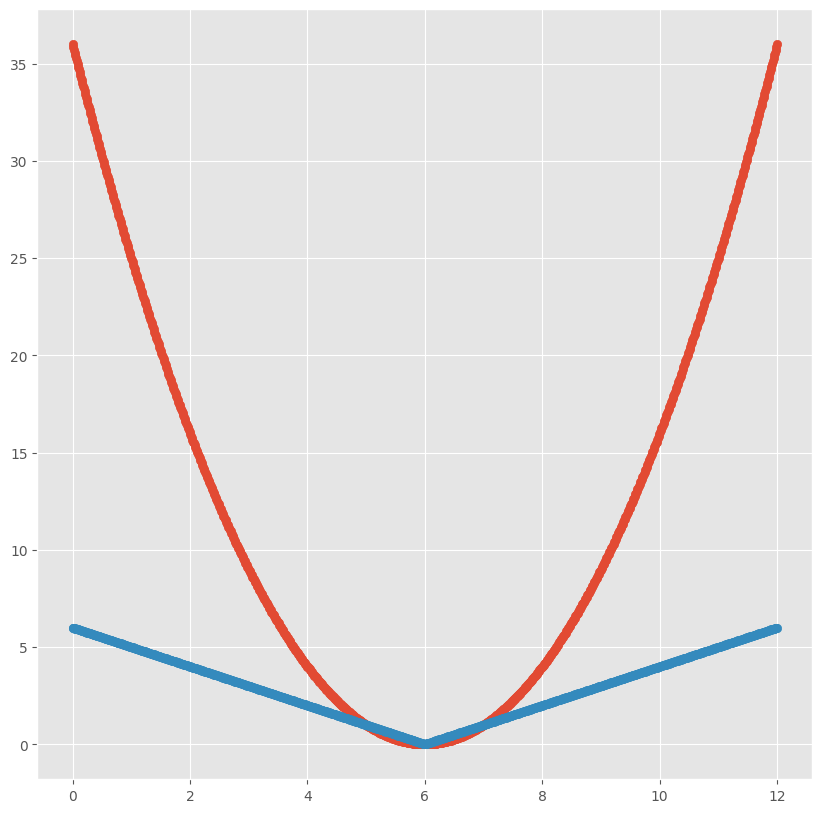

In [93]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

#Standardisation

In [166]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


TypeError: Could not convert string 'ArnoldBobCassandraDonovanEmilyFabianGromHilaryIvanJohnKevinLoiusMandyNatalieOliverPatrickQuitonRobertSofiaTerryUsmanVanessaWilsonXavierYukiZayn' to numeric

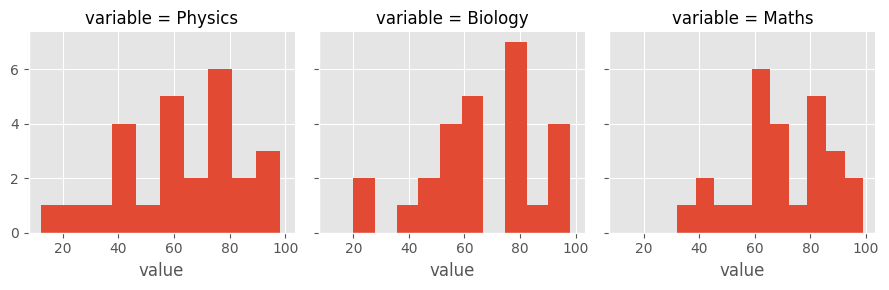

In [97]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [107]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [108]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [109]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


#Mathematics of Probability

In [111]:
from scipy.stats import binom

In [112]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [124]:
1 - binom.pmf(k=10, n=5, p=0.50) - binom.pmf(k=5, n=5, p=0.75)

0.7626953125

In [114]:
binom.cdf(3, n=5, p=0.75)

0.3671875

In [125]:
from scipy.stats import norm

###Standard normal distribution

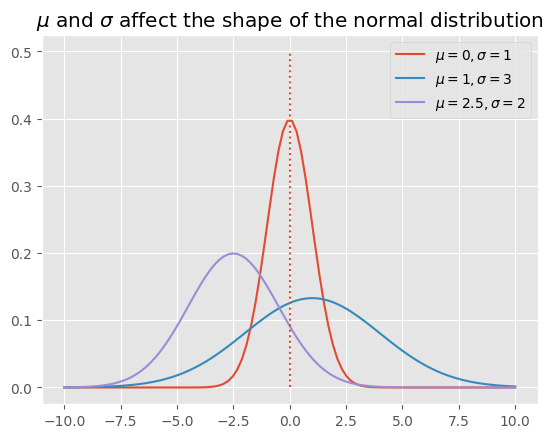

In [130]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=3)
f3 = norm.pdf(x, loc=-2.5, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=3$")
plt.plot(x, f3, label="$\mu=2.5, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

###Programmatic solutions: percent point function
Recall the definition of the cumulative density function.

In [131]:
norm.cdf(0)

0.5

In [132]:
norm.ppf(0.5)

0.0

In [133]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [134]:
169.57 + 7.57

177.14

In [135]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [136]:
169.57 + 2 * 7.57

184.70999999999998

In [137]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [138]:
169.57 - 3 * 7.57

146.85999999999999

###Poisson distribution

In [139]:
from scipy.stats import poisson

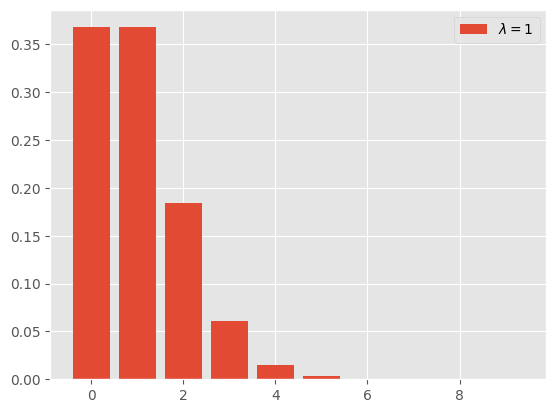

In [140]:
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [141]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda

0.999998874797402

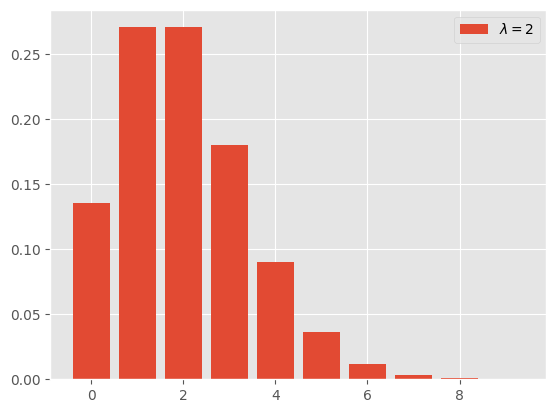

In [142]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [143]:
x @ f2

1.999525105343477

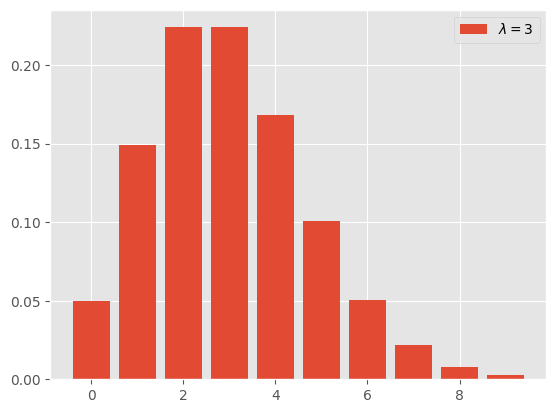

In [144]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [145]:
x @ f3

2.9885910238149727

In [146]:
poisson.pmf(3, 5)

0.1403738958142805

###Central Limit Theorem

In [147]:
from scipy.stats import poisson

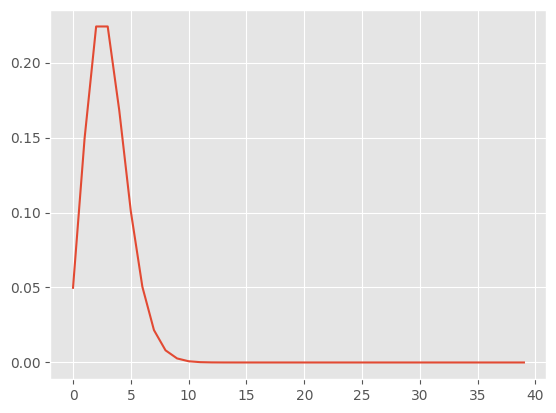

In [148]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 9., 17., 38., 75., 85., 76., 58., 25., 12.,  5.]),
 array([2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1]),
 <BarContainer object of 10 artists>)

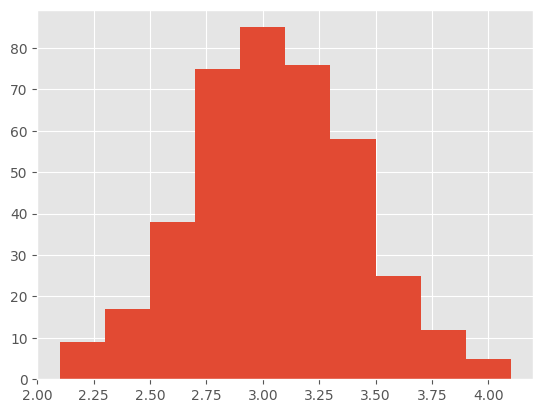

In [149]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

###Using Normal Distribution in Weight Initialization

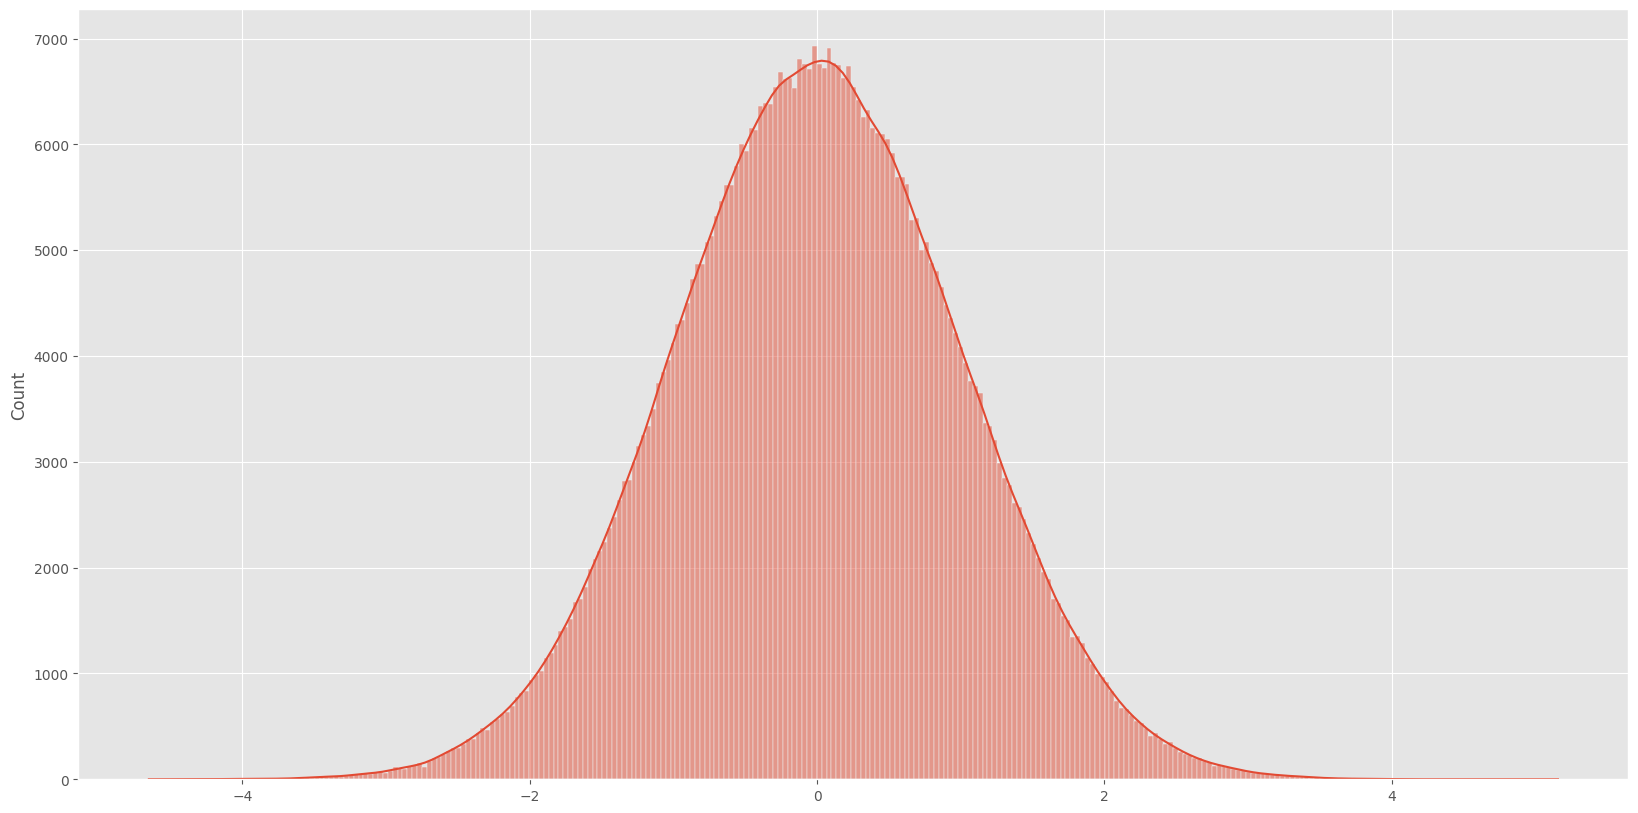

In [157]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(500000))
sns.histplot(x, kde=True)
plt.show()

###Entropy

###A solid-liquid-gas example

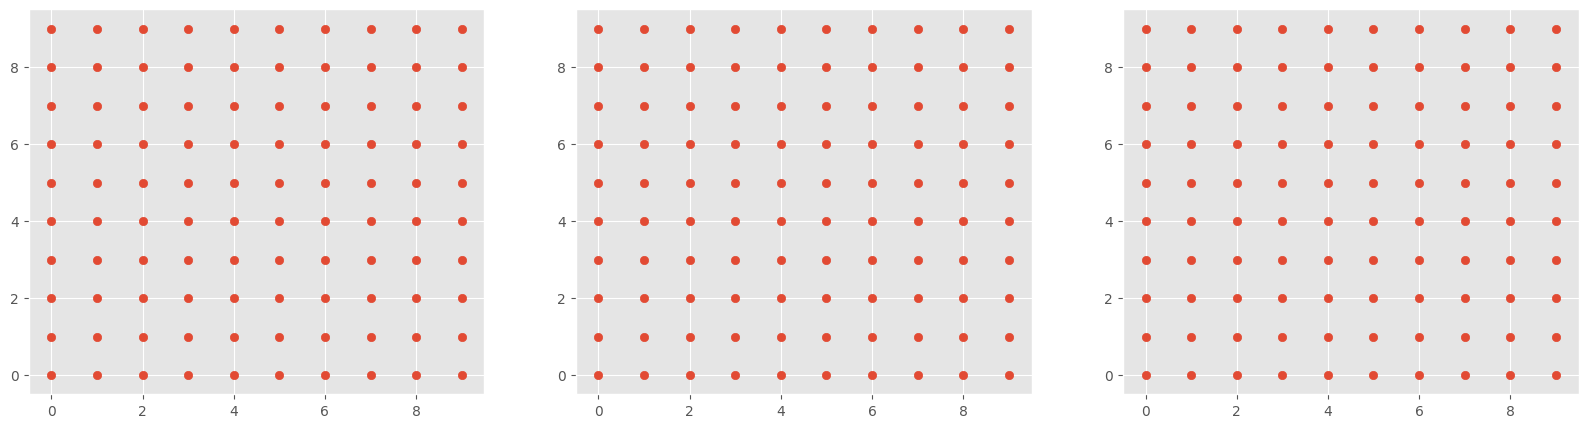

In [158]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

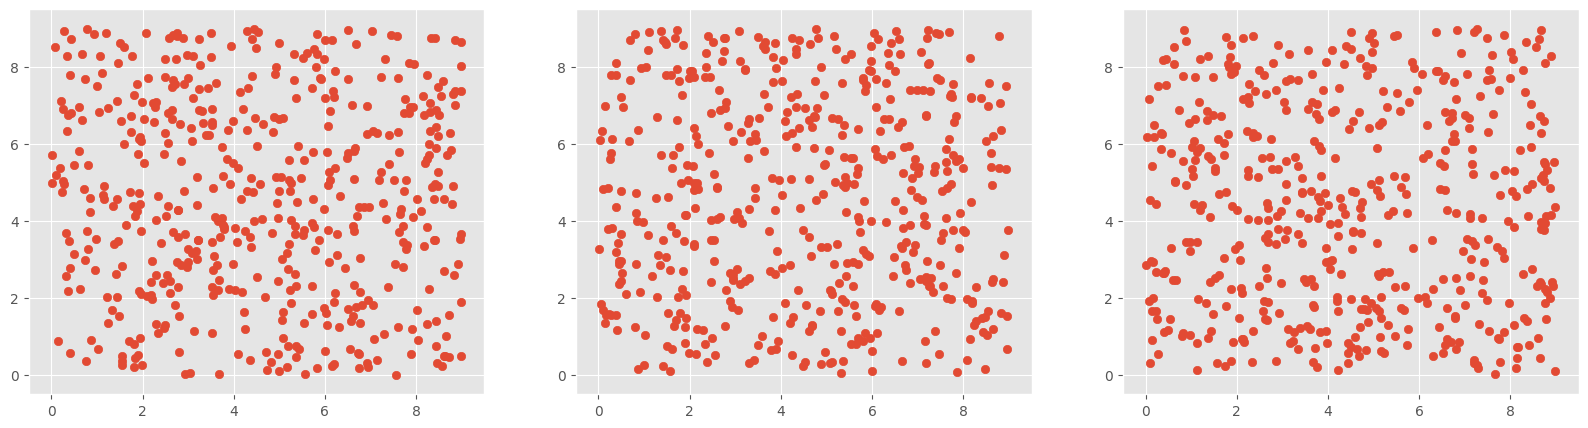

In [163]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(500) * 9, np.random.random(500) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

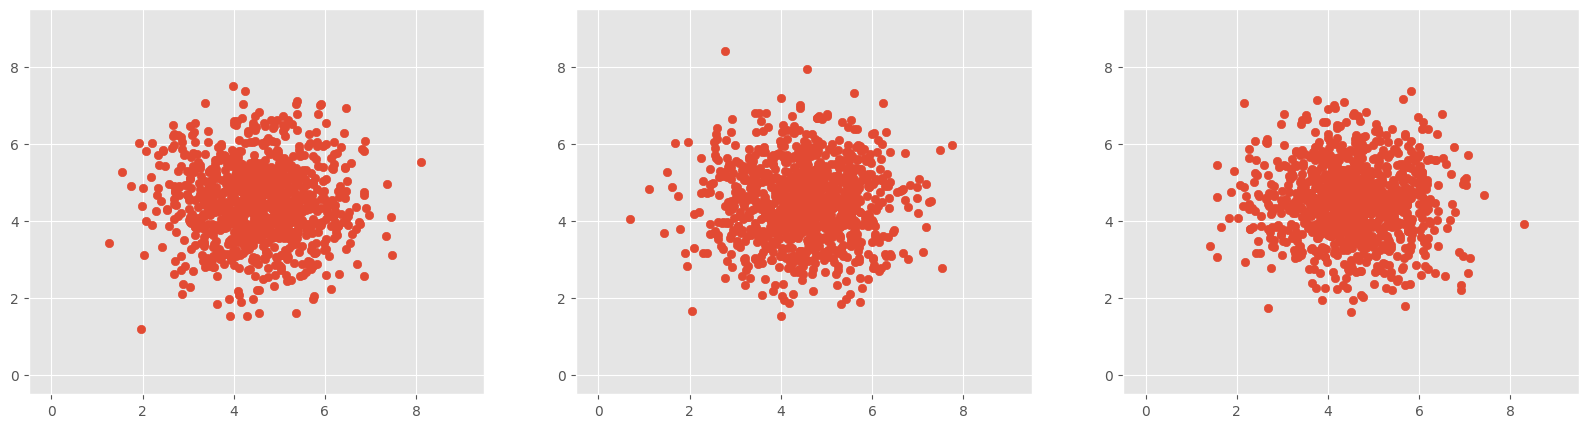

In [165]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=1000), np.random.normal(loc=4.5, scale=1.0, size=1000)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()